In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree

/Users/yanyanxinyi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
credit_case=pd.read_csv('cs-training.csv')
credit_case.head(5)

,Default,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
credit_case.describe()

,Default,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


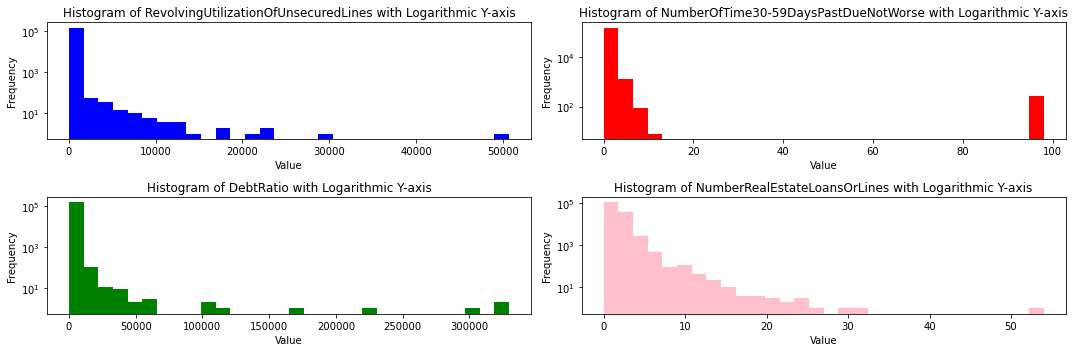

In [4]:
#to check distribution of dependant variables which have extreme value

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5)) # 2 row, 2 columns
data1=credit_case['RevolvingUtilizationOfUnsecuredLines']

axes[0,0].hist(credit_case['RevolvingUtilizationOfUnsecuredLines'], bins=30, color='blue',log=True)
axes[0,0].set_title('Histogram of RevolvingUtilizationOfUnsecuredLines with Logarithmic Y-axis')
axes[0,0].set_xlabel('Value')
axes[0,0].set_ylabel('Frequency')

axes[0,1].hist(credit_case['NumberOfTime30-59DaysPastDueNotWorse'], bins=30, color='red',log=True)
axes[0,1].set_title('Histogram of NumberOfTime30-59DaysPastDueNotWorse with Logarithmic Y-axis')
axes[0,1].set_xlabel('Value')
axes[0,1].set_ylabel('Frequency')

axes[1,0].hist(credit_case['DebtRatio'], bins=30, color='green',log=True)
axes[1,0].set_title('Histogram of DebtRatio with Logarithmic Y-axis')
axes[1,0].set_xlabel('Value')
axes[1,0].set_ylabel('Frequency')

axes[1,1].hist(credit_case['NumberRealEstateLoansOrLines'], bins=30, color='pink',log=True)
axes[1,1].set_title('Histogram of NumberRealEstateLoansOrLines with Logarithmic Y-axis')
axes[1,1].set_xlabel('Value')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### The number of extreme values is not small, doesnt look like data error. They should contain some information, I will keep the extreme value as it is.
#### Need to fill in missing values for MonthlyIncome and Dependants.

In [5]:
#check missing value for MonthlyIncome
credit_case[credit_case['MonthlyIncome'].isna()]

,Default,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
16,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
32,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
41,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149976,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149977,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149984,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149992,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


In [6]:
#fill in missing value for MonthlyIncome with mean 
train_data=credit_case.copy()
Income_mean=train_data['MonthlyIncome'].mean()
train_data['MonthlyIncome'].fillna(Income_mean,inplace=True)
train_data.describe()

,Default,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
#check missing value for Dependent
credit_case[credit_case['NumberOfDependents'].isna()]

,Default,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
96,0,0.542243,48,2,10.0,NaN,2,0,0,0,NaN
109,0,0.041258,61,0,4739.0,NaN,11,0,4,0,NaN
159,0,0.000000,63,0,2.0,NaN,4,0,0,0,NaN
238,0,1.000000,28,0,0.0,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149826,0,0.027319,71,0,1419.0,NaN,13,0,1,0,NaN
149854,0,0.056589,75,0,8.0,NaN,3,0,0,0,NaN
149894,0,0.017904,55,0,1058.0,NaN,8,0,1,1,NaN
149948,0,0.055530,27,0,10.0,NaN,1,0,0,0,NaN


In [8]:
# fill in missing value for NumberOfDependents with median
Dependents_median=train_data['NumberOfDependents'].median()
train_data['NumberOfDependents'].fillna(Dependents_median,inplace=True)
train_data.describe()

,Default,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [9]:
# Min value of Age is 0, this should be data error. Replace 0 with median for Age.

filter_age0=(train_data['age']==0)
age_median=train_data['age'].median()
train_data['age'][filter_age0]=age_median
train_data.describe()

/var/folders/st/m936mqfd5yggdzy8d66nrkpw0000gn/T/ipykernel_80988/475575584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['age'][filter_age0]=age_median


,Default,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295553,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771249,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [10]:
# to check the propotional of Default v.s Non-Default cases
class0=train_data['Default'].value_counts()[0]
print('total number of non-default case: '+ str(class0))
class1=train_data['Default'].value_counts()[1]
print('total number of default case: '+ str(class1))
non_default_rate=class0/(class0+class1)
print('non-default rate : {}%'.format(non_default_rate*100))

total number of non-default case: 139974
total number of default case: 10026
non-default rate : 93.316%


#### Dataset has imbalance-sample problem.

In [11]:
# split the dataset into train(70%) and test(30%)
y=train_data['Default']
x=train_data.iloc[:,1:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [12]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

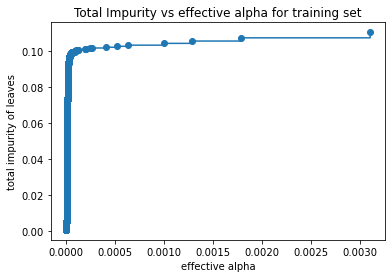

In [13]:
# check the effective alphas and the corresponding total leaf impurities at each step of the pruning process
# remove the maximum effective alpha value, as the tree will be only one node with this effective alpha
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [14]:
np.size(ccp_alphas)

2535

Total number of effective alphas is 2535


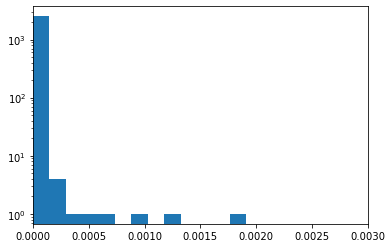

In [86]:
# to check the distribution of effective alphas
print ('Total number of effective alphas is '+str(np.size(ccp_alphas)))
from matplotlib.pyplot import MultipleLocator
fig,ax = plt.subplots()
ax.hist(ccp_alphas,log=True,bins=100)
plt.xlim(0,0.003)
x_major_locator=MultipleLocator(0.0005)
ax.xaxis.set_major_locator(x_major_locator)

#### There are over 2k different effective alphas. After rounding the value to 6 decimals, we have 76 distinct value left.

In [16]:
# rounding effective alphas to 6 dicmals and get unique values
rounded_ccpA=np.round(ccp_alphas,decimals=6)
roundedCCPA_unique=np.unique(rounded_ccpA)
np.count_nonzero(roundedCCPA_unique)

76

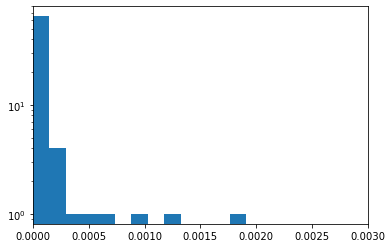

In [17]:
fig,ax = plt.subplots()
ax.hist(roundedCCPA_unique,log=True,bins=100)
plt.xlim(0,0.003)
x_major_locator=MultipleLocator(0.0005)
ax.xaxis.set_major_locator(x_major_locator)

In [18]:
# run decision tree model for each effective alpha
clfs = []
for ccp_alpha in roundedCCPA_unique:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
# clfs will contain multiple decision trees, each element is a decision tree with different effective alpha restriction
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1])
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.014692757406914503


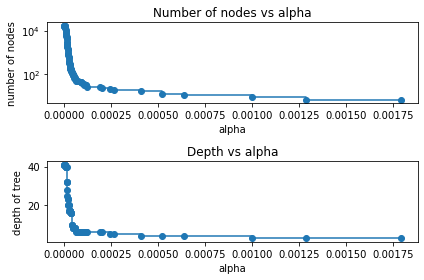

In [30]:
clfs = clfs[:-1]
roundedCCPA_unique = roundedCCPA_unique[:-1]

# Get the depth and and number of nodes for each decision tree
# Plot the relationship between Number of nodes/Depth v.s Effective Alpha

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(roundedCCPA_unique, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[0].set_yscale('log')
#ax[0].axis(xmin=0.00002,xmax=0.0001)
ax[1].plot(roundedCCPA_unique, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

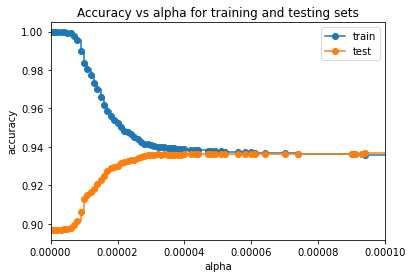

In [29]:
# Get Accuary for each Decision Tree
# Plot Accuary v.s Effective Alpha

train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(roundedCCPA_unique, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(roundedCCPA_unique, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.axis(xmin=0,xmax=0.0001)
ax.legend()
plt.show()

#### When effective alpha < 2*e-5, there is overfitting for training set.
#### While there is obvious alpha decay for effective alpha > 6*e-5.
#### Zoom in to check more on alpha in range (2*e-5,6*e-5)

In [21]:
# zoom in to check more for Alpha range in [2*e-5,6*e-5] 
cp_in_range=(roundedCCPA_unique>=0.00002)&(roundedCCPA_unique<0.00006)
chosen_cp=roundedCCPA_unique[cp_in_range]
chosen_clf=pd.DataFrame(clfs,columns=['tree'])[cp_in_range] #choose decision trees with alpha in the range
np.count_nonzero(chosen_cp)

31

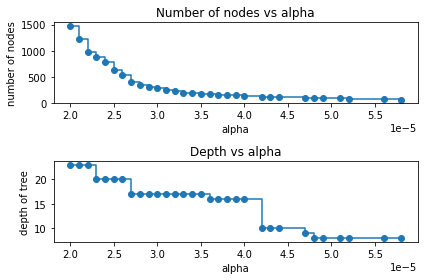

In [22]:
#print relationship of Number of nodes/Depth v.s alpha for alpha in the range 
node_counts_in_range = [clf.tree_.node_count for clf in chosen_clf['tree']]
depth_in_range = [clf.tree_.max_depth for clf in chosen_clf['tree']]
fig, ax = plt.subplots(2, 1)
ax[0].plot(chosen_cp, node_counts_in_range, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(chosen_cp, depth_in_range, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

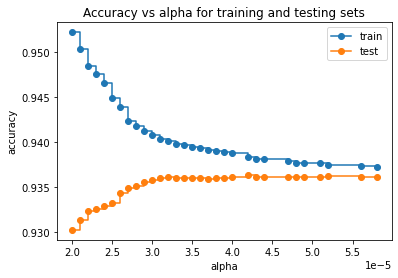

In [23]:
#print accuracy v.s alpha for training and testing sets
train_scores = [clf.score(x_train, y_train) for clf in chosen_clf['tree']]
test_scores = [clf.score(x_test, y_test) for clf in chosen_clf['tree']]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(chosen_cp, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(chosen_cp, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [24]:
# besides accuracy, check balanced accuracy, recall and kappa as well as it's a imbalanced data set.

y_test_pred=[]
for clf in chosen_clf['tree']:
    y=clf.predict(x_test)
    y_test_pred.append(y)

y_train_pred=[]
for clf in chosen_clf['tree']:
    y=clf.predict(x_train)
    y_train_pred.append(y)
   
    
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score
accuracy_test=[accuracy_score(y_test, y_predict) for y_predict in y_test_pred]
accuracy_train=[accuracy_score(y_train, y_predict) for y_predict in y_train_pred]

balanced_accuracy_test=[balanced_accuracy_score(y_test, y_predict) for y_predict in y_test_pred]
balanced_accuracy_train=[balanced_accuracy_score(y_train, y_predict) for y_predict in y_train_pred]

#to calculate Recall for the data=1（Default） class
recall_test=[recall_score(y_test, y_predict,pos_label=1,average='binary') for y_predict in y_test_pred]
recall_train=[recall_score(y_train, y_predict,pos_label=1,average='binary') for y_predict in y_train_pred]

kappa_test=[cohen_kappa_score(y_test, y_predict) for y_predict in y_test_pred]
kappa_train=[cohen_kappa_score(y_train, y_predict) for y_predict in y_train_pred]


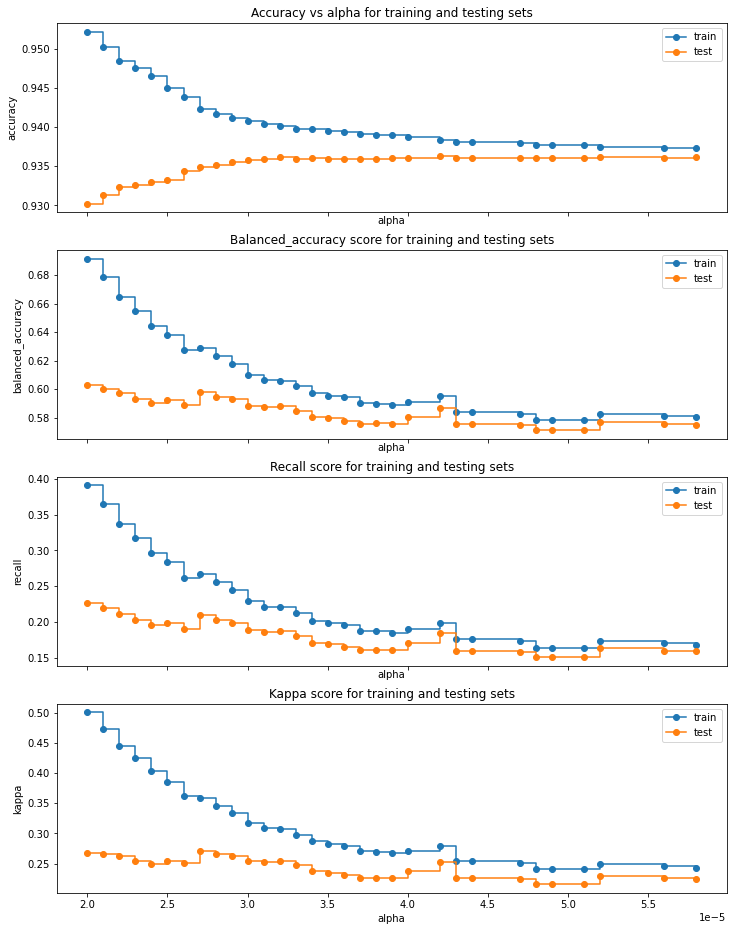

In [25]:
#Plot Accuracy/Balanced Accuracy/Recall/Kappa v.s Alpha for trainning and testing sets

fig, ax = plt.subplots(4, 1,sharex='col', figsize=(12,16))
ax[0].plot(chosen_cp, accuracy_train, marker="o", label="train", drawstyle="steps-post")
ax[0].plot(chosen_cp, accuracy_test, marker="o", label="test", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy vs alpha for training and testing sets")
ax[0].legend()
ax[1].plot(chosen_cp, balanced_accuracy_train, marker="o", label="train",drawstyle="steps-post")
ax[1].plot(chosen_cp, balanced_accuracy_test, marker="o", label="test",drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("balanced_accuracy")
ax[1].set_title("Balanced_accuracy score for training and testing sets")
ax[1].legend()
ax[2].plot(chosen_cp, recall_train, marker="o", label="train", drawstyle="steps-post")
ax[2].plot(chosen_cp, recall_test, marker="o", label="test",drawstyle="steps-post")
ax[2].set_xlabel("alpha")
ax[2].set_ylabel("recall")
ax[2].set_title("Recall score for training and testing sets")
ax[2].legend()
ax[3].plot(chosen_cp, kappa_train, marker="o", label="train",drawstyle="steps-post")
ax[3].plot(chosen_cp, kappa_test, marker="o", label="test",drawstyle="steps-post")
ax[3].set_xlabel("alpha")
ax[3].set_ylabel("kappa")
ax[3].set_title("Kappa score for training and testing sets")
ax[3].legend()
#fig.tight_layout()
plt.show()

#### Balanced accuracy, Recall and Kappa all have a dropping trend when Alpha is larger than 2.7e-5
#### Alpha= 2.7e-5 and 2.0e-5 is local maximun for Balanced accuracy, Recall and Kappa
#### Considering Tree with Alpha=2.0e-5 will have over 1500 nodes and 20+ depth, choose 2.7e-5 as level for effective alpha
#### After determining the Alpha level, try to add penalty level for misclassifying a Default case

In [77]:
# choose 2.7e-5 for cp level
# Define custom weights for classes (i.e to penalize misclassifying class 1 more)
class_weight=[]
for i in range(20):
    weight={0:1}
    weight[1]=(i+1)
    class_weight.append(weight)
#contains a set of class weights, weight on class0 is always 1 while weight on class1 is from 1~20
    
clfs_penalty = []
for weight in class_weight:
    clf_penalty = DecisionTreeClassifier(random_state=42, ccp_alpha=2.700e-05,class_weight=weight)
    clf_penalty.fit(x_train, y_train)
    clfs_penalty.append(clf_penalty)
#each element is a decision tree with different class weights


In [98]:
clfs_penalty[:5]

[DecisionTreeClassifier(ccp_alpha=2.7e-05, class_weight={0: 1, 1: 1},
                        random_state=42),
 DecisionTreeClassifier(ccp_alpha=2.7e-05, class_weight={0: 1, 1: 2},
                        random_state=42),
 DecisionTreeClassifier(ccp_alpha=2.7e-05, class_weight={0: 1, 1: 3},
                        random_state=42),
 DecisionTreeClassifier(ccp_alpha=2.7e-05, class_weight={0: 1, 1: 4},
                        random_state=42),
 DecisionTreeClassifier(ccp_alpha=2.7e-05, class_weight={0: 1, 1: 5},
                        random_state=42)]

In [79]:
# to check accurancy,balanced accuracy, recall and kappa performance for trees with different class weights

y_test_pred_wPenalty=[]
for clf in clfs_penalty:
    y=clf.predict(x_test)
    y_test_pred_wPenalty.append(y)

y_train_pred_wPenalty=[]
for clf in clfs_penalty:
    y=clf.predict(x_train)
    y_train_pred_wPenalty.append(y)
   
    
accuracy_test_wPenalty=[accuracy_score(y_test, y_predict) for y_predict in y_test_pred_wPenalty]
accuracy_train_wPenalty=[accuracy_score(y_train, y_predict) for y_predict in y_train_pred_wPenalty]

balanced_accuracy_test_wPenalty=[balanced_accuracy_score(y_test, y_predict) for y_predict in y_test_pred_wPenalty]
balanced_accuracy_train_wPenalty=[balanced_accuracy_score(y_train, y_predict) for y_predict in y_train_pred_wPenalty]

#to calculate Recall for the data=1 class
recall_test_wPenalty=[recall_score(y_test, y_predict,pos_label=1,average='binary') for y_predict in y_test_pred_wPenalty]
recall_train_wPenalty=[recall_score(y_train, y_predict,pos_label=1,average='binary') for y_predict in y_train_pred_wPenalty]

kappa_test_wPenalty=[cohen_kappa_score(y_test, y_predict) for y_predict in y_test_pred_wPenalty]
kappa_train_wPenalty=[cohen_kappa_score(y_train, y_predict) for y_predict in y_train_pred_wPenalty]


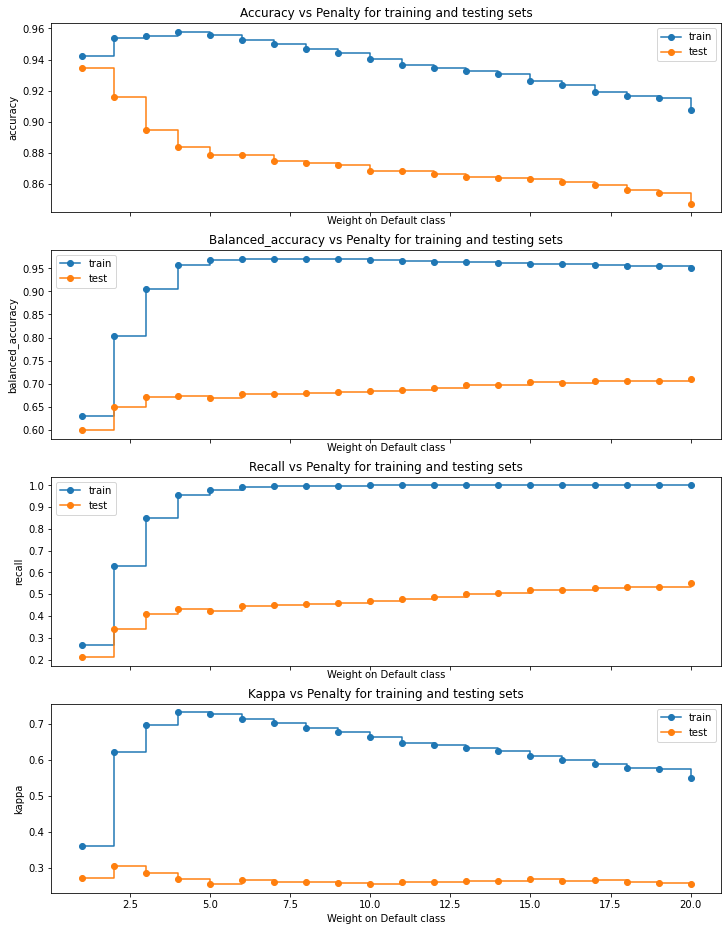

In [88]:
Default_weight=[class_weight[i][1] for i in range(len(class_weight))]

fig, ax = plt.subplots(4, 1,sharex='col', figsize=(12,16))
ax[0].plot(Default_weight, accuracy_train_wPenalty, marker="o", label="train", drawstyle="steps-post")
ax[0].plot(Default_weight, accuracy_test_wPenalty, marker="o", label="test", drawstyle="steps-post")
ax[0].set_xlabel("Weight on Default class")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy vs Penalty for training and testing sets")
ax[0].legend()
ax[1].plot(Default_weight, balanced_accuracy_train_wPenalty, marker="o", label="train",drawstyle="steps-post")
ax[1].plot(Default_weight, balanced_accuracy_test_wPenalty, marker="o", label="test",drawstyle="steps-post")
ax[1].set_xlabel("Weight on Default class")
ax[1].set_ylabel("balanced_accuracy")
ax[1].set_title("Balanced_accuracy vs Penalty for training and testing sets")
ax[1].legend()
ax[2].plot(Default_weight, recall_train_wPenalty, marker="o", label="train", drawstyle="steps-post")
ax[2].plot(Default_weight, recall_test_wPenalty, marker="o", label="test",drawstyle="steps-post")
ax[2].set_xlabel("Weight on Default class")
ax[2].set_ylabel("recall")
ax[2].set_title("Recall vs Penalty for training and testing sets")
ax[2].legend()
ax[3].plot(Default_weight, kappa_train_wPenalty, marker="o", label="train",drawstyle="steps-post")
ax[3].plot(Default_weight, kappa_test_wPenalty, marker="o", label="test",drawstyle="steps-post")
ax[3].set_xlabel("Weight on Default class")
ax[3].set_ylabel("kappa")
ax[3].set_title("Kappa vs Penalty for training and testing sets")
ax[3].legend()
#fig.tight_layout()
plt.show()

#### Accuracy is dropping for training set after class weight > 4
#### Recall is almost 1 for training set when weight>4, which means the tree model predicts postive class too aggreesively and there could be many false postive
#### Balanced accuracy and Recall is having a uptrending in range [0,4]
#### Choose 4 as the weight for class1


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     42020
           1       0.27      0.43      0.33      2980

    accuracy                           0.88     45000
   macro avg       0.61      0.67      0.63     45000
weighted avg       0.91      0.88      0.90     45000

Confusion Matrix:


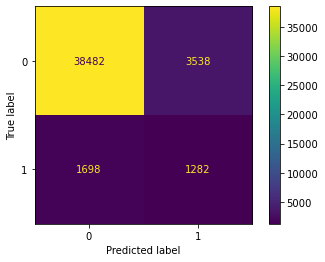

In [95]:
#use 4 as penalty level
clf_final=DecisionTreeClassifier(ccp_alpha=2.7e-05, class_weight={0: 1, 1: 4},random_state=42)
clf_final.fit(x_train, y_train)
y_pred = clf_final.predict(x_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=clf_final.classes_)
disp.plot()
plt.show()